## 01_data_understanding.ipynb

Purpose:
    -> Shape
    -> Columns meaning
    -> Units
    -> Target variable
 

In [16]:
import pandas as pd

In [17]:
#load data from csv file
DF=pd.read_csv('../data/raw/synthetic_food_dataset_imbalanced.csv')
#display first few rows of the dataframe
DF.head()

,Calories,Protein,Fat,Carbs,Sugar,Fiber,Sodium,Cholesterol,Glycemic_Index,Water_Content,Serving_Size,Meal_Type,Preparation_Method,Is_Vegan,Is_Gluten_Free,Food_Name
0,290.463673,14.340084,14.152608,35.266644,4.828030,1.291432,647.553389,24.990309,81.575896,45.669118,197.570043,dinner,fried,False,False,Pizza
1,212.626748,4.080908,11.621584,23.218957,16.347814,0.130303,68.572414,34.301652,69.522492,49.854415,103.833510,snack,raw,False,True,Ice Cream
2,330.695408,14.326708,19.747680,29.479164,6.251137,0.794477,663.171859,34.816834,62.552384,40.132866,198.989367,snack,raw,False,False,Burger
3,198.070798,9.452445,5.475896,32.097878,2.984621,1.710468,300.749543,28.510998,68.688853,57.423461,135.714202,lunch,fried,False,True,Sushi
4,274.496228,6.099547,16.256002,29.756638,17.352958,1.465676,296.314958,15.403173,70.385059,33.170460,73.019474,snack,baked,False,False,Donut


## Column Overview

- Numerical features: Calories, Protein, Fat, Carbs, Sugar, Fiber, Sodium, Cholesterol, Glycemic_Index, Water_Content, Serving_Size
- Categorical features: Meal_Type, Preparation_Method
- Boolean features: Is_Vegan, Is_Gluten_Free
- Target variable: Food_Name


In [18]:
DF.shape

(31700, 16)

In [19]:
DF.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31700 entries, 0 to 31699
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Calories            31325 non-null  float64
 1   Protein             31325 non-null  float64
 2   Fat                 31325 non-null  float64
 3   Carbs               31325 non-null  float64
 4   Sugar               31325 non-null  float64
 5   Fiber               31325 non-null  float64
 6   Sodium              31325 non-null  float64
 7   Cholesterol         31325 non-null  float64
 8   Glycemic_Index      31325 non-null  float64
 9   Water_Content       31325 non-null  float64
 10  Serving_Size        31325 non-null  float64
 11  Meal_Type           31700 non-null  object 
 12  Preparation_Method  31700 non-null  object 
 13  Is_Vegan            31700 non-null  bool   
 14  Is_Gluten_Free      31700 non-null  bool   
 15  Food_Name           31700 non-null  object 
dtypes: b

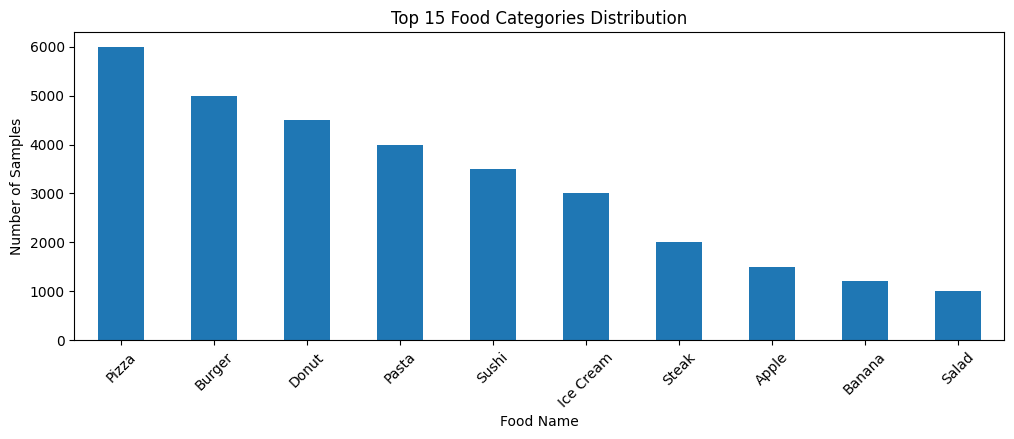

count      10.000000
mean     3170.000000
std      1722.433679
min      1000.000000
25%      1625.000000
50%      3250.000000
75%      4375.000000
max      6000.000000
Name: count, dtype: float64

In [20]:
import matplotlib.pyplot as plt

food_counts = DF['Food_Name'].value_counts()

plt.figure(figsize=(12,4))
food_counts.head(15).plot(kind='bar')
plt.title("Top 15 Food Categories Distribution")
plt.xlabel("Food Name")
plt.ylabel("Number of Samples")
plt.xticks(rotation=45)
plt.show()

food_counts.describe()


### Target Distribution Observations

- The dataset exhibits class imbalance across food categories.
- A few food items dominate the dataset, while several classes have relatively fewer samples.
- This imbalance motivates the use of stratified sampling and macro-averaged evaluation metrics
  during model training and evaluation.

In [21]:
DF.columns

Index(['Calories', 'Protein', 'Fat', 'Carbs', 'Sugar', 'Fiber', 'Sodium',
       'Cholesterol', 'Glycemic_Index', 'Water_Content', 'Serving_Size',
       'Meal_Type', 'Preparation_Method', 'Is_Vegan', 'Is_Gluten_Free',
       'Food_Name'],
      dtype='object')

In [26]:
missing_values = DF.isna().sum()
duplicate_rows = DF.duplicated().sum()
print("Missing values in each column:\n", missing_values)
print("\nNumber of duplicate rows:", duplicate_rows)

Missing values in each column:
 Calories              375
Protein               375
Fat                   375
Carbs                 375
Sugar                 375
Fiber                 375
Sodium                375
Cholesterol           375
Glycemic_Index        375
Water_Content         375
Serving_Size          375
Meal_Type               0
Preparation_Method      0
Is_Vegan                0
Is_Gluten_Free          0
Food_Name               0
dtype: int64

Number of duplicate rows: 313


### Data Quality Observations

- Approximately 375 rows contain missing values across numerical nutritional features.
- Missing values are not present in categorical or boolean features.
- 313 duplicate rows were identified in the dataset.
- These findings indicate the need for:
  - Numerical feature imputation
  - Duplicate row removal during preprocessing

## Dataset Understanding Summary

- The dataset contains 31,700 records with 16 features, combining numerical nutritional values,
  categorical context variables, and boolean dietary indicators.
- Numerical nutritional features exhibit missing values (~1.2% of records), indicating the
  need for imputation during preprocessing.
- Duplicate entries are present, which may introduce bias if not handled before modeling.
- The target variable (`Food_Name`) shows clear class imbalance, requiring stratified sampling
  and macro-averaged evaluation metrics during model training.
- Nutritional features such as calories, fat, sugar, and sodium are likely to help differentiate food categories.
- Based on these observations, a dedicated data cleaning and preprocessing pipeline is
  required before feature engineering and model training.


## Dataset Understanding Summary [ Explain in Presentation in short ]

- The dataset contains 31,700 records with numerical, categorical, and boolean features.
- Some numerical features contain missing values, which will be handled during data cleaning.
- Duplicate rows are present and should be removed before modeling.
- The target variable is imbalanced, so stratified sampling and macro-averaged metrics will be used.
- Nutritional features such as calories, fat, and sugar are likely to help distinguish food categories.
- Based on these observations, data cleaning and preprocessing will be performed next.

